In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# Q1.1: Consider the messages: 

# a)

In [3]:
list_message = ["A bird in the hand is worth two in the bush", "The early bird gets the worm",  "Time is money" ,"Honesty is the best policy"]


X: 
[[0 0 0 1]
 [1 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [2 0 0 0]
 [1 0 1 1]
 [0 0 1 0]
 [0 0 0 1]
 [2 2 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]]
words: ['best' 'bird' 'bush' 'early' 'gets' 'hand' 'honesty' 'in' 'is' 'money'
 'policy' 'the' 'time' 'two' 'worm' 'worth']
best  	 count: 1
bird  	 count: 2
bush  	 count: 1
early  	 count: 1
gets  	 count: 1
hand  	 count: 1
honesty  	 count: 1
in  	 count: 2
is  	 count: 3
money  	 count: 1
policy  	 count: 1
the  	 count: 5
time  	 count: 1
two  	 count: 1
worm  	 count: 1
worth  	 count: 1
dictionary: {'best': 1, 'bird': 2, 'bush': 1, 'early': 1, 'gets': 1, 'hand': 1, 'honesty': 1, 'in': 2, 'is': 3, 'money': 1, 'policy': 1, 'the': 5, 'time': 1, 'two': 1, 'worm': 1, 'worth': 1}


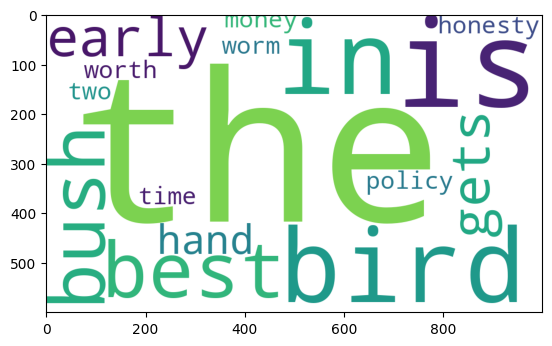

In [4]:

# Create instance of count vectorizer
vectorizer = CountVectorizer()
# Perform word counts
Xfit = vectorizer.fit_transform(list_message)
# Generate feature matrix (transpose so sample axis is in column direction)
X = Xfit.toarray().T
print("X: \n{}".format(X))
# List words in vocabulary (turn into numpy array)
words = np.array(vectorizer.get_feature_names_out())
print("words: {}".format(words))


# Count number of times each word appears in all messages
word_count = np.sum(X,axis=1)
for i,word in enumerate(words):
    print("{}  \t count: {}".format(word,word_count[i]))
    

# Create a dictionary where key = word and value = word_count for each word    
dict_freq = {words[i]:word_count[i] for i in range(np.size(words))}
print("dictionary: {}".format(dict_freq))


# Generate word cloud from frequencies
wc = WordCloud(background_color="white",width=1000,height=600, random_state=11).generate_from_frequencies(dict_freq)
plt.figure()
plt.imshow(wc)
plt.show()

# b)

best  	 count: 1
bird  	 count: 2
bush  	 count: 1
early  	 count: 1
gets  	 count: 1
hand  	 count: 1
honesty  	 count: 1
money  	 count: 1
policy  	 count: 1
time  	 count: 1
two  	 count: 1
worm  	 count: 1
worth  	 count: 1
dictionary: {'best': 1, 'bird': 2, 'bush': 1, 'early': 1, 'gets': 1, 'hand': 1, 'honesty': 1, 'money': 1, 'policy': 1, 'time': 1, 'two': 1, 'worm': 1, 'worth': 1}


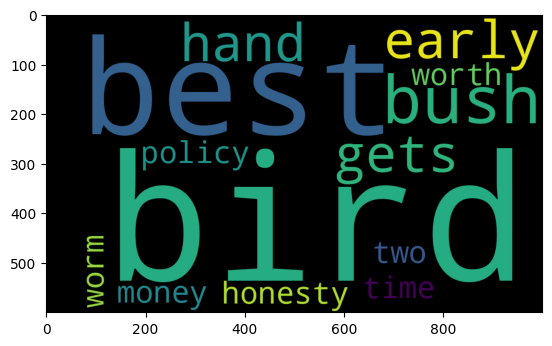

In [5]:

# Create instance of count vectorizer with stop words
vectorizer = CountVectorizer(stop_words=["the", "is", "in"])
# Perform word counts
X_fit = vectorizer.fit_transform(list_message)
# Generate feature matrix (transpose so sample axis is in column direction)
X = X_fit.toarray().T

# List words in vocabulary (turn into numpy array)
words = np.array(vectorizer.get_feature_names_out())

# Count number of times each word appears in all messages
word_count = np.sum(X, axis=1)
for i, word in enumerate(words):
    print("{}  \t count: {}".format(word, word_count[i]))

# Create a dictionary where key = word and value = word_count for each word
dict_freq = {words[i]: word_count[i] for i in range(np.size(words))}
print("dictionary: {}".format(dict_freq))

# Generate word cloud from frequencies
wc = WordCloud(
    background_color="black",
    width=1000,
    height=600,
    random_state=11
).generate_from_frequencies(dict_freq)

plt.figure()
plt.imshow(wc)
plt.show()

# Q1.2

# a)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np

# Input text documents
documents = ["Call me soon", "CALL to win", "Pick me up soon"]

# Step 2: Create CountVectorizer matrix
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(documents)
count_array =count_matrix.toarray()
# Step 3: Calculate document frequency (df) for each word
df_vector = np.sum(count_array > 0, axis=0)

# Step 4: Create TF-IDF matrix
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(count_matrix)

# Step 5: Access TF-IDF matrix and feature names

feature_names = vectorizer.get_feature_names_out()

# Print the TF-IDF matrix and feature names
print(" Matrix:")
print(count_array)
print("\nFeature Names:")
print(feature_names)

 Matrix:
[[1 1 0 1 0 0 0]
 [1 0 0 0 1 0 1]
 [0 1 1 1 0 1 0]]

Feature Names:
['call' 'me' 'pick' 'soon' 'to' 'up' 'win']


# b)

In [7]:
n=len(documents)
idf=np.log((1+n)/(1+df_vector))+1

# c)

In [8]:
U=count_array*idf

In [9]:

print("counter vectorizer matrix : ")
print(count_array)

print("\ndocument fequency df_vector : ")
print(df_vector)

print("\ninverse document fequency idf : ")
print(idf)


print("\nunscaled Tfidf matrix : ")
print(U)

counter vectorizer matrix : 
[[1 1 0 1 0 0 0]
 [1 0 0 0 1 0 1]
 [0 1 1 1 0 1 0]]

document fequency df_vector : 
[2 2 1 2 1 1 1]

inverse document fequency idf : 
[1.28768207 1.28768207 1.69314718 1.28768207 1.69314718 1.69314718
 1.69314718]

unscaled Tfidf matrix : 
[[1.28768207 1.28768207 0.         1.28768207 0.         0.
  0.        ]
 [1.28768207 0.         0.         0.         1.69314718 0.
  1.69314718]
 [0.         1.28768207 1.69314718 1.28768207 0.         1.69314718
  0.        ]]


# d)

In [10]:
W=np.sqrt(np.sum(U**2,axis=0))
T=U/W

print("tfidf matrix (T) computed from unscaled matrix (U) :\n")
print(T)

print("\ntfidf matrix obtained directly from TfidfVectorizer :\n")
print(tfidf_matrix.toarray())

tfidf matrix (T) computed from unscaled matrix (U) :

[[0.70710678 0.70710678 0.         0.70710678 0.         0.
  0.        ]
 [0.70710678 0.         0.         0.         1.         0.
  1.        ]
 [0.         0.70710678 1.         0.70710678 0.         1.
  0.        ]]

tfidf matrix obtained directly from TfidfVectorizer :

[[0.57735027 0.57735027 0.         0.57735027 0.         0.
  0.        ]
 [0.4736296  0.         0.         0.         0.62276601 0.
  0.62276601]
 [0.         0.42804604 0.5628291  0.42804604 0.         0.5628291
  0.        ]]
